In [99]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from itertools import chain

In [100]:
data = json.load(open("./scripts/stats/stats.json", mode="r", encoding="utf-8"), parse_int=lambda x: int(x))
cat_sizes = data["categories_size"]
dimensions = data["dimensions"]



In [101]:
dict(sorted(cat_sizes.items(), key=lambda a: a[0]))

{'adriaen-van-ostade': 77,
 'agnolo-bronzino': 70,
 'albrecht-altdorfer': 69,
 'albrecht-durer': 696,
 'aleksey-savrasov': 199,
 'alexey-venetsianov': 74,
 'alfred-stevens': 53,
 'anders-zorn': 78,
 'andrea-del-sarto': 49,
 'andrea-mantegna': 123,
 'andrei-ryabushkin': 44,
 'anthony-van-dyck': 145,
 'antoine-pesne': 58,
 'antoine-watteau': 64,
 'arkhip-kuindzhi': 49,
 'bartolome-esteban-murillo': 149,
 'benjamin-west': 54,
 'benozzo-gozzoli': 122,
 'bernardo-bellotto': 74,
 'boris-kustodiev': 344,
 'camille-corot': 404,
 'camille-pissarro': 48,
 'canaletto': 145,
 'caravaggio': 65,
 'carlo-crivelli': 76,
 'caspar-david-friedrich': 104,
 'charles-francois-daubigny': 79,
 'cornelis-springer': 60,
 'correggio': 51,
 'dante-gabriel-rossetti': 158,
 'david-teniers-the-younger': 62,
 'diego-velazquez': 114,
 'dmitry-levitzky': 89,
 'domenico-ghirlandaio': 91,
 'edouard-manet': 94,
 'edward-burne-jones': 129,
 'edward-hopper': 99,
 'edwin-henry-landseer': 45,
 'el-greco': 137,
 'esaias-van-de

In [102]:
dimensions = dict(sorted(dimensions.items(), key=lambda e: int(e[0][:-3])))
dimensions

{'000k': 38,
 '100k': 2183,
 '200k': 1386,
 '300k': 1215,
 '400k': 1615,
 '500k': 1352,
 '600k': 2338,
 '700k': 2668,
 '800k': 1629,
 '900k': 957,
 '1000k': 618,
 '1100k': 443,
 '1200k': 329,
 '1300k': 224,
 '1400k': 221,
 '1500k': 125,
 '1600k': 112,
 '1700k': 111,
 '1800k': 106,
 '1900k': 137,
 '2000k': 108,
 '2100k': 102,
 '2200k': 72,
 '2300k': 88,
 '2400k': 92,
 '2500k': 88,
 '2600k': 71,
 '2700k': 77,
 '2800k': 108,
 '2900k': 114,
 '3000k': 97,
 '3100k': 120,
 '3200k': 83,
 '3300k': 76,
 '3400k': 64,
 '3500k': 57,
 '3600k': 42,
 '3700k': 48,
 '3800k': 44,
 '3900k': 59,
 '4000k': 67,
 '4100k': 54,
 '4200k': 69,
 '4300k': 58,
 '4400k': 65,
 '4500k': 53,
 '4600k': 42,
 '4700k': 33,
 '4800k': 36,
 '4900k': 64,
 '5000k': 71,
 '5100k': 55,
 '5200k': 60,
 '5300k': 61,
 '5400k': 45,
 '5500k': 39,
 '5600k': 50,
 '5700k': 39,
 '5800k': 36,
 '5900k': 50,
 '6000k': 26,
 '6100k': 22,
 '6200k': 28,
 '6300k': 28,
 '6400k': 23,
 '6500k': 28,
 '6600k': 22,
 '6700k': 19,
 '6800k': 20,
 '6900k': 23

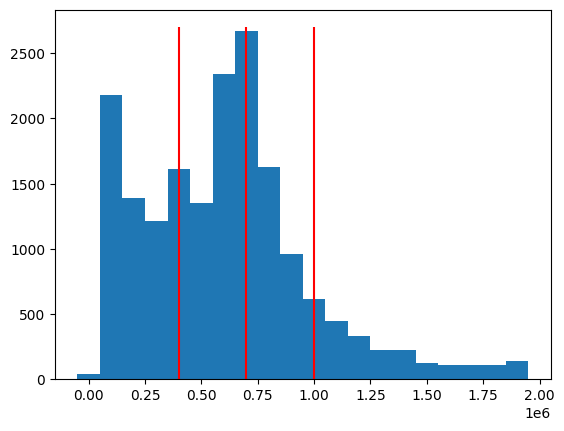

In [112]:
pd_dim = pd.DataFrame(dimensions.items(), columns=["lower_bound", "frequency"])

pd_dim["lower_bound"] = pd_dim["lower_bound"].str.replace("k", "000").astype(int)

values = pd.Series(chain.from_iterable([[lb] * f for _, lb, f in pd_dim.itertuples()]))

Q1 = values.quantile(0.25)
Q2 = values.quantile(0.5)
Q3 = values.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_dim = pd_dim[(pd_dim["lower_bound"] >= lower_bound) & (pd_dim["lower_bound"] <= upper_bound)]

plt.figure()
plt.bar(filtered_dim["lower_bound"], filtered_dim["frequency"], width=1e5)
plt.vlines(Q1, ymin=0, ymax=2700, colors="red")
plt.vlines(Q2, ymin=0, ymax=2700, colors="red")
plt.vlines(Q3, ymin=0, ymax=2700, colors="red")
plt.show()